# 基本文本处理技能


# 分词的概念

分词就是将语句中的词汇按照使用时的含义切分出来的过程，也即是将一个汉字序列切分成一个个又单独含义的词语

# 分词的原则

1.颗粒度越大越好：用于进行语义分析的文本分词，要求分词结果的颗粒度越大，即单词的字数越多，所能表示的含义越确切

2.切分结果中非词典词越少越好，单字字典词数越少越好，这里的“非词典词”就是不包含在词典中的单字，而“单字字典词”指的是可以独立运用的单字

3.总体词数越少越好，在相同字数的情况下，总词数越少，说明语义单元越少，那么相对的单个语义单元的权重会越大，因此准确性会越高。

# 匹配方法

正向最大匹配法:正向即从前往后取词，从7->1，每次减一个字，直到词典命中或剩下1个单字。

逆向最大匹配法:逆向即从后往前取词，其他逻辑和正向相同。

双向最大匹配法:两种算法都切一遍，然后根据大颗粒度词越多越好，非词典词和单字词越少越好的原则，选取其中一种分词结果输出。

# 词、字符频率统计

In [12]:
#coding=utf-8
import collections

str = "What is the weather today ? Today is a sunny day ."
str = str.lower().split(" ")
m = collections.Counter(str)
print(m)

Counter({'is': 2, 'today': 2, 'what': 1, 'the': 1, 'weather': 1, '?': 1, 'a': 1, 'sunny': 1, 'day': 1, '.': 1})


# n-gram语言模型

N-Gram是一种基于统计语言模型的算法。它的基本思想是将文本里面的内容按照字节进行大小为N的滑动窗口操作，形成了长度是N的字节片段序列.

每一个字节片段称为gram，对所有gram的出现频度进行统计，并且按照事先设定好的阈值进行过滤，形成关键gram列表，也就是这个文本的向量特征空间，列表中的每一种gram就是一个特征向量维度。

该模型基于的假设是，第N个词的出现只与前面N-1个词相关，而与其它任何词都不相关，整句的概率就是各个词出现概率的乘积。

如果我们有一个由 m 个词组成的序列（或者说一个句子），我们希望算得概率P,根据链式规则：
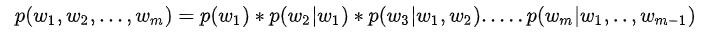

利用马尔科夫链的假设，即当前这个词仅仅跟前面几个有限的词相关，因此也就不必追溯到最开始的那个词，这样便可以大幅缩减上述算式的长度。即
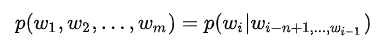

当 n=1, 一个一元模型（unigram model)即为 ：
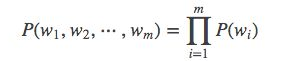

当 n=2, 一个二元模型（bigram model)即为 ：
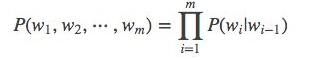

当 n=3, 一个三元模型（trigram model)即为
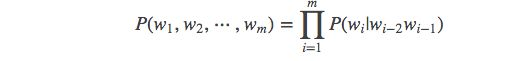

# 文本矩阵化

# 1.分词

这里采用的是jieba分词组件,他的特点是：

（1）支持三种分词模式：

    精确模式，试图将句子最精确地切开，适合文本分析；
    全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
    搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。

（2）支持繁体分词

（3）支持自定义词典

In [15]:
# encoding=utf-8
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\16248\AppData\Local\Temp\jieba.cache
Loading model cost 0.874 seconds.
Prefix dict has been built succesfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


# 2.去停用词

主要思想是分词过后，遍历一下停用词表，去掉停用词。

In [40]:
import jieba  

# jieba.load_userdict('userdict.txt')  
# 创建停用词list  
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
  

# 对句子进行分词  
def seg_sentence(sentence):  
    sentence_seged = jieba.cut(sentence)  
    stopwords = stopwordslist('./stopwords-master/哈工大停用词表.txt')  # 这里加载停用词的路径  
    outstr = ''  
    for word in sentence_seged:
#         print(word)
        if word not in stopwords:  
            if word != '\t':  
                outstr += word  
                outstr += " "  
    return outstr
corpus = []
inputs = "印度在莫迪过去五年的领导下多次与中国爆发纠纷。两国军方2017年在有边界争议的朗地区发生对峙，最终在当年“金砖五国”峰会举行前结束，但另一方面，中国和印度在国际舞台也不乏各种合作关系。"
line_seg = seg_sentence(inputs)  # 这里的返回值是字符串  
corpus.append(line_seg)
print(corpus)


['印度 莫迪 过去 五年 领导 下 多次 中国 爆发 纠纷 两 国 军方 2017 年 边界 争议 朗 地区 发生 对峙 最终 当年 金砖 五国 峰会 举行 前 结束 中国 印度 国际舞台 不乏 合作 关系 ']


# 3.向量化

In [20]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer=CountVectorizer()
corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 
print(vectorizer.fit_transform(corpus)) 
print(vectorizer.fit_transform(corpus).toarray()) 
print(vectorizer.get_feature_names()) 

  (0, 16)	1
  (0, 3)	1
  (0, 15)	2
  (0, 4)	1
  (1, 5)	1
  (1, 9)	1
  (1, 2)	1
  (1, 6)	1
  (1, 14)	1
  (1, 3)	1
  (2, 1)	1
  (2, 0)	1
  (2, 12)	1
  (2, 7)	1
  (3, 10)	1
  (3, 8)	1
  (3, 11)	1
  (3, 18)	1
  (3, 17)	1
  (3, 13)	1
  (3, 5)	1
  (3, 6)	1
  (3, 15)	1
[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1]]
['and', 'apple', 'car', 'china', 'come', 'in', 'is', 'love', 'papers', 'polupar', 'science', 'some', 'tea', 'the', 'this', 'to', 'travel', 'work', 'write']
